<a href="https://colab.research.google.com/github/ChanceDurr/DS-Unit-4-Sprint-1-NLP/blob/master/module1-text-data/Chance_Dare_LS_DS_421_Text_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Keep part in this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

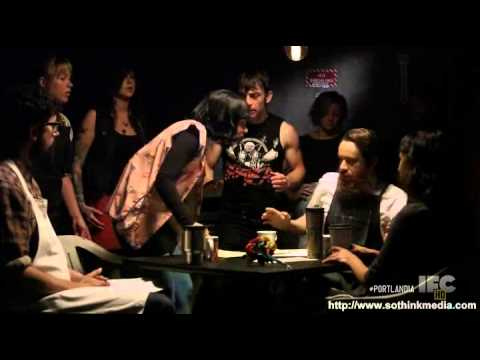

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [0]:
import pandas as pd
shops = pd.read_csv('https://raw.githubusercontent.com/ChanceDurr/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv')

shops['rating'] = shops['star_rating'].apply(lambda x: x[:2]).astype('float')
del shops['star_rating']
shops['date'] = shops['full_review_text'].apply(lambda x: x.split()[0])
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: " ".join(x.split()[1:]))

In [5]:
shops.head()

,coffee_shop_name,full_review_text,rating,date
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0,11/25/2016
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,12/2/2016
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2.0,11/25/2016
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0,12/3/2016


In [6]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 826.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.1.0-cp36-none-any.whl size=828255076 sha256=70f9b5c2d7b40843bfd7499a4488a0389ff05edc2deb498e85c23969e7111d0a
  Stored in directory: /tmp/pip-ephem-wheel-cache-k903zw0q/wheels/b4/d7/70/426d313a459f82ed5e06cc36a50e2bb2f0ec5cb31d8e0bdf09
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [7]:
import spacy
import spacy.cli
spacy.cli.download("en_core_web_lg")

nlp = spacy.load('en_core_web_lg')

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [0]:
def get_lemmas(text):
  
  lemmas = []
  
  doc = nlp(text)
  
  for token in doc:
    if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
      lemmas.append(token.lemma_)
      
  return lemmas



In [0]:
shops['tokens'] = shops['full_review_text'].apply(get_lemmas)

In [10]:
shops['tokens']

0       [1, check, love, love, love, atmosphere, corne...
1       [list, Date, Night, Austin, Ambiance, Austin, ...
2       [1, check, list, Brunch, Spots, love, eclectic...
3       [cool, decor, good, drink, nice, seating, over...
4       [1, check, locate, Northcross, mall, shopping,...
5       [1, check, cute, cafe, think, moment, step, fi...
6       [2, check, in, list, Nuptial, Coffee, Bliss, A...
7       [2, check, in, love, place, 5, star, cleanline...
8       [1, check, ok, let, try, approach, pro, music,...
9       [3, check, in, place, show, social, medium, da...
10      [1, check, list, Americano, average, cute, stu...
11      [store, A+, decoration, honestly, coffee, good...
12      [1, check, list, 2016, Time, Charm, Factory, a...
13      [cute, little, cafe, drive, place, time, notic...
14      [beautiful, eccentric, coffee, shop, library, ...
15      [1, check, list, Search, Fantastic, Coffee, wa...
16      [love, atmosphere, frequent, coffee, shop, def...
17      [1, ch

In [0]:
from collections import Counter

def count(docs):
  word_counts = Counter()
  appears_in = Counter()
  
  total_docs = len(docs)
  
  for doc in docs:
    word_counts.update(doc)
    appears_in.update(set(doc))
    
  temp = zip(word_counts.keys(), word_counts.values())
  
  wc = pd.DataFrame(temp, columns = ['word', 'count'])
  
  wc['rank'] = wc['count'].rank(method='first', ascending=False)
  total = wc['count'].sum()
  
  wc['pct_total'] = wc['count'].apply(lambda x: x / total)
  
  wc = wc.sort_values(by='rank')
  wc['cul_pct+total'] = wc['pct_total'].cumsum()
  
  t2 = zip(appears_in.keys(), appears_in.values())
  ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
  wc = ac.merge(wc, on='word')
  
  wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
  
  return wc.sort_values(by='rank')

In [0]:
wc = count(shops['tokens'])

In [13]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct+total,appears_in_pct
21,coffee,4848,10153,1.0,0.028068,0.028068,0.636555
120,place,3879,6026,2.0,0.016659,0.044728,0.509322
158,good,3590,5393,3.0,0.014909,0.059637,0.471376
138,great,2843,3924,4.0,0.010848,0.070485,0.373293
27,check,3175,3467,5.0,0.009585,0.080070,0.416886


In [14]:
pip install squarify

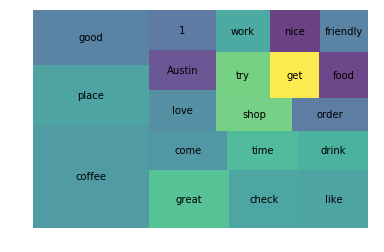

In [15]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()


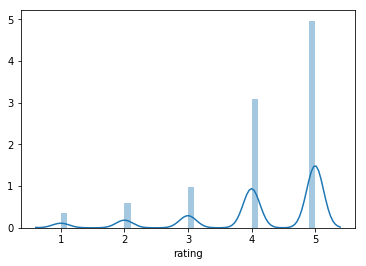

In [16]:
import seaborn as sns

sns.distplot(shops['rating'])

In [0]:
wc_bad = count(shops[shops['rating'] < 4]['tokens'])

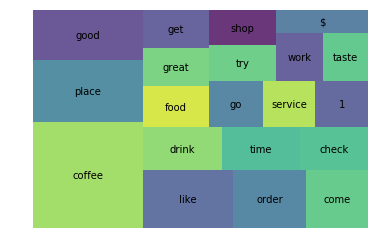

In [42]:
wc_top20_bad = wc_bad[wc_bad['rank'] <= 20]

squarify.plot(sizes=wc_top20_bad['pct_total'], label=wc_top20_bad['word'], alpha=.8)
plt.axis('off')
plt.show()

In [0]:
wc_good = count(shops[shops['rating'] > 4]['tokens'])

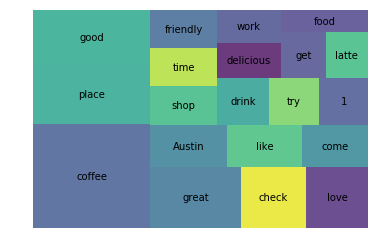

In [22]:
wc_top20_good = wc_good[wc_good['rank'] <= 20]

squarify.plot(sizes=wc_top20_good['pct_total'], label=wc_top20_good['word'], alpha=.8)
plt.axis('off')
plt.show()

In [0]:
diff = wc_good[['word', 'appears_in_pct']].merge(wc_bad[['word', 'appears_in_pct']], on='word', how='outer', suffixes=('', '_bad'))

In [44]:
diff.head()

,word,appears_in_pct,appears_in_pct_bad
0,coffee,0.620635,0.631436
1,place,0.491270,0.510840
2,good,0.453704,0.434959
3,great,0.411905,0.234417
4,check,0.387566,0.331301


In [0]:
diff['diff'] = diff['appears_in_pct'] - diff['appears_in_pct_bad']

In [46]:
diff.sort_values(by='diff')

,word,appears_in_pct,appears_in_pct_bad,diff
7,like,0.237302,0.403794,-0.166492
22,order,0.146561,0.292005,-0.145445
264,bad,0.028042,0.128726,-0.100684
31,go,0.128307,0.228320,-0.100013
137,ask,0.049735,0.149051,-0.099316
52,pretty,0.092857,0.191734,-0.098877
109,$,0.053439,0.147696,-0.094257
30,service,0.140212,0.234417,-0.094206
45,taste,0.101058,0.189702,-0.088644
58,think,0.089418,0.177507,-0.088089


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play the the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

